In [19]:
import pandas as pd
import numpy as np
import pickle
import re
import timeit
import spacy
import copy

import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel, HdpModel, LdaModel, LdaMulticore
from nltk.corpus import stopwords
import helper as he

with open('../../data/preprocessed_data/doc_indexes/gst.pkl','rb') as f:
    texts,INITIAL_DOC_SIZE, DOC_TEMPORAL_INCREMENT = pickle.load(f)

with open('../../data/preprocessed_data/corpus_dict/gst_corp.pkl', 'rb') as f:
    data_lemmatized, _, _ = pickle.load(f)

In [20]:
for i in DOC_TEMPORAL_INCREMENT[:135]:
    INITIAL_DOC_SIZE+=i
# DOC_TEMPORAL_INCREMENT=DOC_TEMPORAL_INCREMENT[-10:]
# INITIAL_DOC_SIZE = DOC_TEMPORAL_INCREMENT[135]
DOC_TEMPORAL_INCREMENT = DOC_TEMPORAL_INCREMENT[136:]

In [21]:
# Set Data State to that of existing model in simulation
data = data_lemmatized[:INITIAL_DOC_SIZE]
id2word = Dictionary(documents=data_lemmatized)
corpus = [id2word.doc2bow(doc) for doc in data]

# Building for the first time - To be considered as the starting/existing model in simulation.
lda = LdaMulticore(corpus, num_topics=35, id2word=id2word,
                   workers=3, chunksize=2000, passes=10, batch=False)

#Baseline Model
corpus_baseline = copy.deepcopy(corpus)
lda_baseline = copy.deepcopy(lda)

In [22]:
# The loop simulates arrival of new documents in batches where batch_size is defined in DOC_TEMPORAL_INCREMENT
doc_size = []
positive_arr = []

f2 = open('../../data/temp/gst_confusion.pkl', 'wb')

count = 0
doc_size_counter = INITIAL_DOC_SIZE
print('Total Corpus Length:',len(data_lemmatized))
for i in DOC_TEMPORAL_INCREMENT:
    # new_docs is the list of STEP_SIZE new documents which have arrived
    new_docs = data_lemmatized[doc_size_counter:doc_size_counter+i]
    doc_size_counter += i

    prev_corpus = copy.deepcopy(corpus)

    # Converting Documents to doc2bow format so that they can be fed to models
    corpus = [id2word.doc2bow(doc) for doc in new_docs]
    count += 1

    print('MODEL NO:'+str(count))
    lda.update(corpus)
    print('MODEL DONE')

    prev_corpus.extend(corpus)
    corpus = copy.deepcopy(prev_corpus)

    doc_size.append(i)
    positive_arr.append(he.calc_confusion_matrix(
        lda_baseline, lda, corpus))

    pickle.dump((positive_arr, doc_size), f2)

f2.close()

Total Corpus Length: 22179
MODEL NO:1
MODEL DONE
Corpus 1 Length -  12615
MODEL NO:2
MODEL DONE
Corpus 1 Length -  13192
MODEL NO:3
MODEL DONE
Corpus 1 Length -  13563
MODEL NO:4
MODEL DONE
Corpus 1 Length -  13862
MODEL NO:5
MODEL DONE
Corpus 1 Length -  14083
MODEL NO:6
MODEL DONE
Corpus 1 Length -  14408
MODEL NO:7
MODEL DONE
Corpus 1 Length -  14727
MODEL NO:8
MODEL DONE
Corpus 1 Length -  15185
MODEL NO:9
MODEL DONE
Corpus 1 Length -  15492
MODEL NO:10
MODEL DONE
Corpus 1 Length -  16022
MODEL NO:11
MODEL DONE
Corpus 1 Length -  16288
MODEL NO:12
MODEL DONE
Corpus 1 Length -  16440
MODEL NO:13
MODEL DONE
Corpus 1 Length -  16606
MODEL NO:14
MODEL DONE
Corpus 1 Length -  16888
MODEL NO:15
MODEL DONE
Corpus 1 Length -  17237
MODEL NO:16
MODEL DONE
Corpus 1 Length -  17501
MODEL NO:17
MODEL DONE
Corpus 1 Length -  17664
MODEL NO:18
MODEL DONE
Corpus 1 Length -  17774
MODEL NO:19
MODEL DONE
Corpus 1 Length -  17924
MODEL NO:20
MODEL DONE
Corpus 1 Length -  18038
MODEL NO:21
MODEL DONE

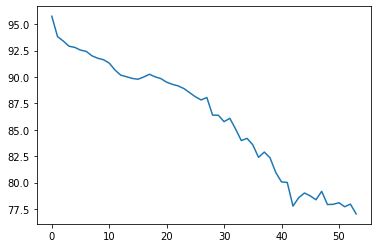

In [23]:
import matplotlib.pyplot as plt
plt.plot(positive_arr)
plt.show()

In [24]:
positive_arr

[95.76,
 93.83,
 93.41,
 92.92,
 92.81,
 92.55,
 92.43,
 92.01,
 91.78,
 91.64,
 91.32,
 90.67,
 90.18,
 90.03,
 89.87,
 89.79,
 90.0,
 90.26,
 90.02,
 89.85,
 89.51,
 89.31,
 89.16,
 88.91,
 88.52,
 88.13,
 87.83,
 88.06,
 86.39,
 86.38,
 85.77,
 86.09,
 85.08,
 83.98,
 84.19,
 83.58,
 82.39,
 82.89,
 82.35,
 80.96,
 80.06,
 80.01,
 77.77,
 78.57,
 79.01,
 78.74,
 78.37,
 79.17,
 77.92,
 77.94,
 78.09,
 77.71,
 77.96,
 77.03]